In [9]:
#librerias
import pandas as pd
import numpy as np
import pyodbc

import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')


**1. Selección de datos**

In [2]:
#Conexión database
conn = pyodbc.connect(DRIVER='{ODBC Driver 17 for SQL Server}',
                      SERVER='dblatinkadwh.database.windows.net',
                      DATABASE='DWH_LaTinka',
                      UID='sandra.sanchez',
                      PWD='Latinka01*')
print(conn)


In [3]:
#No se tomó en cuenta los datos con target null
q0 = """SELECT *
        FROM [EDS].[TABLON_VARIABLE_FUGA]
        WHERE CODMES=202304"""
df = pd.read_sql_query(q0,conn)

#Cerrar conexión 
conn.close()

In [4]:
df

,CODMES,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION,FECHA_PRIMERA_RECARGA,FECHA_ULTIMA_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,INDICE_FELICIDAD
0,202304,1353400.0,30.0,1.0,2022-08-10,2022-08-10,Tinka,5. Ocasional,4. Perdido,5. Muy Bajo,1977-07-31,0.0
1,202304,959710.0,20.0,1.0,2022-12-02,2022-12-02,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1977-07-27,0.0
2,202304,1815598.0,80.0,1.0,2022-07-18,2022-07-18,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1981-10-21,1.0
3,202304,1986982.0,90.0,1.0,2022-11-06,2022-11-06,None,5. Ocasional,4. Perdido,5. Muy Bajo,1981-05-22,0.0
4,202304,2368223.0,300.0,1.0,2022-12-30,2022-12-30,Te Apuesto,5. Ocasional,4. Perdido,4. Bajo,1990-06-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
470125,202304,857247.0,20.0,1.0,2022-05-05,2022-05-05,Te Apuesto,3. Frecuente,4. Perdido,5. Muy Bajo,1996-05-09,1.0
470126,202304,1950088.0,20.0,1.0,2022-10-14,2022-10-14,Tinka,4. Habitual,4. Perdido,5. Muy Bajo,1993-10-26,0.0
470127,202304,681724.0,50.0,1.0,2022-05-17,2022-05-17,Raspaya,5. Ocasional,4. Perdido,5. Muy Bajo,1982-03-17,0.0
470128,202304,1277514.0,288.0,1.0,2022-10-23,2022-10-23,Tinka,5. Ocasional,4. Perdido,4. Bajo,1997-08-14,0.0


**2. Procesamiento**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470130 entries, 0 to 470129
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CODMES                 470130 non-null  int64  
 1   ID_CLIENTE             470129 non-null  float64
 2   TOTAL_RECARGA          470130 non-null  float64
 3   TOTAL_TRANSACCION      470130 non-null  float64
 4   FECHA_PRIMERA_RECARGA  470130 non-null  object 
 5   FECHA_ULTIMA_RECARGA   470130 non-null  object 
 6   PRODUCTO_PRINCIPAL     457999 non-null  object 
 7   FRECUENCY              467873 non-null  object 
 8   RECENCY                467873 non-null  object 
 9   MONETARY               467873 non-null  object 
 10  FECHA_NACIMIENTO       470012 non-null  object 
 11  INDICE_FELICIDAD       470129 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 43.0+ MB


In [6]:
#Conversion de String a datetime
#df['FECHA_ALTA_SISTEMA'] = pd.to_datetime(df['FECHA_ALTA_SISTEMA'], format = "%Y-%m-%d")
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], format = "%Y-%m-%d",errors='coerce')
df['FECHA_PRIMERA_RECARGA'] = pd.to_datetime(df['FECHA_PRIMERA_RECARGA'], format="%Y-%m-%d",errors='coerce')
df['FECHA_ULTIMA_RECARGA'] = pd.to_datetime(df['FECHA_ULTIMA_RECARGA'], format = "%Y-%m-%d",errors='coerce')

In [7]:
df.isnull().sum()

CODMES                       0
ID_CLIENTE                   1
TOTAL_RECARGA                0
TOTAL_TRANSACCION            0
FECHA_PRIMERA_RECARGA        0
FECHA_ULTIMA_RECARGA         0
PRODUCTO_PRINCIPAL       12131
FRECUENCY                 2257
RECENCY                   2257
MONETARY                  2257
FECHA_NACIMIENTO           120
INDICE_FELICIDAD             1
dtype: int64

In [8]:
df['INDICE_FELICIDAD'] = df['INDICE_FELICIDAD'].fillna(2)

In [9]:
#Eliminar filas con valores nulos 
df.dropna(inplace=True)

In [10]:
#Calular la Edad
df['EDAD'] = ((datetime.now() -df['FECHA_NACIMIENTO']).dt.days / 365).round(0).astype("int64")

In [11]:
df['DIAS_CON'] = (df['FECHA_PRIMERA_RECARGA']-df['FECHA_PRIMERA_RECARGA']).dt.days

In [12]:
#Reclass variables
df['PRODUCTO_PRINCIPAL'] = np.where(df['PRODUCTO_PRINCIPAL'] == 'Tinka', 1, 
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Kabala', 2,
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Te Apuesto', 3,
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Casino', 4,
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Gana Diario', 5,
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Raspaya', 6,
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Kinelo', 7,
                                            np.where(df['PRODUCTO_PRINCIPAL'] == 'Ganagol', 8,9))))))))

# df['ESTADO_CLIENTE'] = np.where(df['ESTADO_CLIENTE'] == '4. No Activo',4,
#                                         np.where(df['ESTADO_CLIENTE'] == '2. Recurrente',2,
#                                         np.where(df['ESTADO_CLIENTE'] == '3. Esporadico',3,1)))

df['FRECUENCY'] = np.where(df['FRECUENCY'] == '1. Permanente',1,
                                   np.where(df['FRECUENCY'] == '1. Permanente',1,
                                   np.where(df['FRECUENCY'] == '2. Intensivo',2,
                                   np.where(df['FRECUENCY'] == '3. Frecuente',3,
                                   np.where(df['FRECUENCY'] == '4. Habitual',4,5)))))

df['MONETARY'] = np.where(df['MONETARY'] == '1. Muy Alto',1,
                          np.where(df['MONETARY'] == '2. Alto', 2,
                          np.where(df['MONETARY'] == '3. Medio', 3,
                          np.where(df['MONETARY'] == '4. Bajo', 4,5))))

df['RECENCY'] = np.where(df['RECENCY'] == '4. Perdido', 1, 0)

df['INDICE_FELICIDAD'] = np.where(df['INDICE_FELICIDAD'] == 'No Feliz',0,np.where(df['INDICE_FELICIDAD'] == 2,2,1))

In [13]:
df.set_index('ID_CLIENTE',inplace=True)

In [14]:
df.head()

,CODMES,TOTAL_RECARGA,TOTAL_TRANSACCION,FECHA_PRIMERA_RECARGA,FECHA_ULTIMA_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,INDICE_FELICIDAD,EDAD,DIAS_CON
ID_CLIENTE,,,,,,,,,,,,,
1353400.0,202304,30.0,1.0,2022-08-10,2022-08-10,1,5,1,5,1977-07-31,1,46,0
959710.0,202304,20.0,1.0,2022-12-02,2022-12-02,3,5,1,5,1977-07-27,1,46,0
1815598.0,202304,80.0,1.0,2022-07-18,2022-07-18,3,5,1,5,1981-10-21,1,42,0
2368223.0,202304,300.0,1.0,2022-12-30,2022-12-30,3,5,1,4,1990-06-06,1,33,0
1729181.0,202304,20.0,1.0,2022-06-04,2022-06-04,2,4,1,5,1984-03-13,1,39,0


In [15]:
df2 = df.loc[:, ['TOTAL_RECARGA', 'TOTAL_TRANSACCION', 'PRODUCTO_PRINCIPAL',
                'FRECUENCY', 'MONETARY', 'RECENCY', 'EDAD', 'DIAS_CON', 'INDICE_FELICIDAD']]

In [16]:
df2.groupby('RECENCY')['RECENCY'].count()

RECENCY
0    196878
1    260949
Name: RECENCY, dtype: int64

## División en objetivo y variables

In [17]:
X = df2.drop(['RECENCY'], axis=1)
Y = df2['RECENCY']

In [18]:
X.head(3)

,TOTAL_RECARGA,TOTAL_TRANSACCION,PRODUCTO_PRINCIPAL,FRECUENCY,MONETARY,EDAD,DIAS_CON,INDICE_FELICIDAD
ID_CLIENTE,,,,,,,,
1353400.0,30.0,1.0,1,5,5,46,0,1
959710.0,20.0,1.0,3,5,5,46,0,1
1815598.0,80.0,1.0,3,5,5,42,0,1


In [19]:
Y.unique()

array([1, 0])

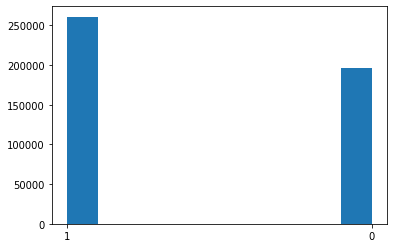

In [20]:
plt.hist(df2['RECENCY'].astype('str'))
plt.show()

## Usando UBML

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
print(len(X_train))
print(len(X_test))

366261
91566


In [52]:
from ubml.train_test import classification_train_test
metrics_performance, best_model = classification_train_test(x_train=X_train, x_test=X_test, y_train=Y_train, y_test=Y_test)
print(best_model)
metrics_performance


In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)


LogisticRegression()

In [23]:
## Exportar el modelo 
import joblib
joblib.dump(lr,"tinka_model_lr2.pkl")

['tinka_model_lr2.pkl']

In [24]:
Y_predic = lr.predict(X_test)
print(Y_predic)


[1 1 1 ... 1 1 1]


In [25]:
prob_test_data = lr.predict_proba(X_test)
print(prob_test_data)

[[0.32489051 0.67510949]
 [0.34906583 0.65093417]
 [0.20520682 0.79479318]
 ...
 [0.34987243 0.65012757]
 [0.28801463 0.71198537]
 [0.32733368 0.67266632]]


In [26]:
len(X_test)


91566

In [27]:
len(Y_predic)


91566

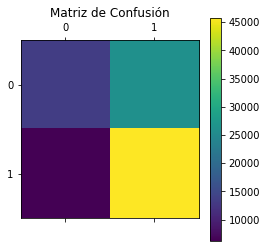

In [28]:
#Matriz de confusion 
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(Y_test, Y_predic)
pl.matshow(cm)
pl.title('Matriz de Confusión')
pl.colorbar()
pl.show()


In [30]:
from sklearn.metrics import confusion_matrix
# y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predic)
print(cm)


[[13435 26098]
 [ 6231 45802]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predic))

              precision    recall  f1-score   support

           0       0.68      0.34      0.45     39533
           1       0.64      0.88      0.74     52033

    accuracy                           0.65     91566
   macro avg       0.66      0.61      0.60     91566
weighted avg       0.66      0.65      0.62     91566



# 3. Predicción

In [7]:
#Importar el modelo 
import joblib
model = joblib.load("tinka_model_lr2.pkl")

In [10]:
#Conexión database
conn1 = pyodbc.connect(DRIVER='{ODBC Driver 17 for SQL Server}',
                      SERVER='dblatinkadwh.database.windows.net',
                      DATABASE='DWH_LaTinka',
                      UID='sandra.sanchez',
                      PWD='Latinka01*')

In [11]:
# No se tomó en cuenta los datos con target null
q1 = """SELECT *
        FROM EDS.TABLON_VARIABLE_FUGA """
df2 = pd.read_sql_query(q1, conn1)

#Cerrar conexión
conn1.close()


In [12]:
df2

,CODMES,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION,FECHA_PRIMERA_RECARGA,FECHA_ULTIMA_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,INDICE_FELICIDAD
0,202301,1870460.0,20.00,1.0,2022-11-30,2022-11-30,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1997-03-25,0.0
1,202301,2031003.0,64.00,3.0,2022-11-19,2022-11-24,Te Apuesto,3. Frecuente,4. Perdido,5. Muy Bajo,1990-05-25,0.0
2,202301,1861970.0,45.00,2.0,2022-08-16,2022-12-03,Te Apuesto,4. Habitual,3. Dormido 2,5. Muy Bajo,1995-06-17,1.0
3,202301,839610.0,18.67,1.0,2022-07-07,2023-01-11,Tinka,5. Ocasional,2. Dormido 1,5. Muy Bajo,1986-12-24,0.0
4,202301,2153536.0,44.00,1.0,2022-12-13,2022-12-13,Te Apuesto,4. Habitual,3. Dormido 2,5. Muy Bajo,2001-07-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5437735,202304,857247.0,20.00,1.0,2022-05-05,2022-05-05,Te Apuesto,3. Frecuente,4. Perdido,5. Muy Bajo,1996-05-09,1.0
5437736,202304,1950088.0,20.00,1.0,2022-10-14,2022-10-14,Tinka,4. Habitual,4. Perdido,5. Muy Bajo,1993-10-26,0.0
5437737,202304,681724.0,50.00,1.0,2022-05-17,2022-05-17,Raspaya,5. Ocasional,4. Perdido,5. Muy Bajo,1982-03-17,0.0
5437738,202304,1277514.0,288.00,1.0,2022-10-23,2022-10-23,Tinka,5. Ocasional,4. Perdido,4. Bajo,1997-08-14,0.0


In [13]:
df2 = df2.rename(columns={'TOTAL_TRANSACCION':'TOTAL_TRANSACCION_RECARGA','FECHA_PRIMERA_RECARGA':'FECHA_PRIMERA_ACCION','FECHA_ULTIMA_RECARGA':'FECHA_ULTIMA_ACCION','INDICE_FELICIDAD':'FLG_FELICIDAD'})

In [14]:
#Conversion de String a datetime
#df2['FECHA_ALTA_SISTEMA'] = pd.to_datetime(df2['FECHA_ALTA_SISTEMA'], format = "%Y-%m-%d")
df2['FECHA_NACIMIENTO'] = pd.to_datetime(df2['FECHA_NACIMIENTO'], format = "%Y-%m-%d",errors='coerce')
df2['FECHA_PRIMERA_ACCION'] = pd.to_datetime(df2['FECHA_PRIMERA_ACCION'], format="%Y-%m-%d",errors='coerce')
df2['FECHA_ULTIMA_ACCION'] = pd.to_datetime(df2['FECHA_ULTIMA_ACCION'], format = "%Y-%m-%d",errors='coerce')

In [15]:
# Eliminar filas con valores nulos
df2.dropna(inplace=True)


# Calular la Edad
# Calular la Edad
df2['EDAD'] = ((datetime.now() - df2['FECHA_NACIMIENTO']).dt.days / 365).round(0).astype("int64")

df2['DIAS_CON'] = (df2['FECHA_ULTIMA_ACCION']-df2['FECHA_PRIMERA_ACCION']).dt.days


In [16]:

# Reclass variables
df2['PRODUCTO_PRINCIPAL'] = np.where(df2['PRODUCTO_PRINCIPAL'] == 'Tinka', 1,
                                    np.where(df2['PRODUCTO_PRINCIPAL'] == 'Kabala', 2,
                                             np.where(df2['PRODUCTO_PRINCIPAL'] == 'Te Apuesto', 3,
                                                      np.where(df2['PRODUCTO_PRINCIPAL'] == 'Casino', 4,
                                                               np.where(df2['PRODUCTO_PRINCIPAL'] == 'Gana Diario', 5,
                                                                        np.where(df2['PRODUCTO_PRINCIPAL'] == 'Raspaya', 6,
                                                                                 np.where(df2['PRODUCTO_PRINCIPAL'] == 'Kinelo', 7,
                                                                                          np.where(df2['PRODUCTO_PRINCIPAL'] == 'Ganagol', 8, 9))))))))

#df2['ESTADO_CLIENTE'] = np.where(df2['ESTADO_CLIENTE'] == '4. No Activo', 4,
#                                np.where(df2['ESTADO_CLIENTE'] == '2. Recurrente', 2,
#                                         np.where(df2['ESTADO_CLIENTE'] == '3. Esporadico', 3, 1)))

df2['FRECUENCY'] = np.where(df2['FRECUENCY'] == '1. Permanente', 1,
                           np.where(df2['FRECUENCY'] == '1. Permanente', 1,
                                    np.where(df2['FRECUENCY'] == '2. Intensivo', 2,
                                             np.where(df2['FRECUENCY'] == '3. Frecuente', 3,
                                                      np.where(df2['FRECUENCY'] == '4. Habitual', 4, 5)))))

df2['MONETARY'] = np.where(df2['MONETARY'] == '1. Muy Alto', 1,
                          np.where(df2['MONETARY'] == '2. Alto', 2,
                          np.where(df2['MONETARY'] == '3. Medio', 3,
                                   np.where(df2['MONETARY'] == '4. Bajo', 4, 5))))

df2['RECENCY'] = np.where(df2['RECENCY'] == '4. Perdido', 1, 0)

df2['FLG_FELICIDAD'] = np.where(df2['FLG_FELICIDAD'] == 'No Feliz', 0, np.where(df2['FLG_FELICIDAD'] == 2, 2, 1))


In [17]:
df3 = df2.loc[:,['ID_CLIENTE','TOTAL_RECARGA', 'TOTAL_TRANSACCION_RECARGA','PRODUCTO_PRINCIPAL', 'FRECUENCY', 'MONETARY', 'RECENCY', 'EDAD', 'DIAS_CON', 'FLG_FELICIDAD']]

In [18]:
X_2023 = df3.drop(columns=['ID_CLIENTE','RECENCY'], axis=1)

In [19]:
X_2023.head()

,TOTAL_RECARGA,TOTAL_TRANSACCION_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,MONETARY,EDAD,DIAS_CON,FLG_FELICIDAD
0,20.00,1.0,3,5,5,26,0,1
1,64.00,3.0,3,3,5,33,5,1
2,45.00,2.0,3,4,5,28,109,1
3,18.67,1.0,1,5,5,36,188,1
4,44.00,1.0,3,4,5,22,0,1


In [20]:
Y_predict_2023 = model.predict(X_2023)
Y_predict_prob_2023 = model.predict_proba(X_2023)


In [21]:
len(Y_predict_2023)

4945976

In [22]:
Y_predict_prob_2023[:,0]

array([0.33738974, 0.5901071 , 0.45992045, ..., 0.27860106, 0.34405107,
       0.35057218])

In [23]:
#Probabilidad de no activo = PROB_REG_LOG
#no activo = 0 , Activo = 1
df3['REG_LOG'] = Y_predict_2023
df3['PROB_REG_LOG'] = (Y_predict_prob_2023[:,0]).round(2)

In [24]:
df3.head()

,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,MONETARY,RECENCY,EDAD,DIAS_CON,FLG_FELICIDAD,REG_LOG,PROB_REG_LOG
0,1870460.0,20.00,1.0,3,5,5,1,26,0,1,1,0.34
1,2031003.0,64.00,3.0,3,3,5,1,33,5,1,0,0.59
2,1861970.0,45.00,2.0,3,4,5,0,28,109,1,1,0.46
3,839610.0,18.67,1.0,1,5,5,0,36,188,1,1,0.40
4,2153536.0,44.00,1.0,3,4,5,0,22,0,1,1,0.41


In [25]:
# Probabilidad de no activo = PROB_REG_LOG
# no activo = 0 , Activo = 1
df2['REG_LOG'] = Y_predict_2023
df2['PROB_REG_LOG'] = (Y_predict_prob_2023[:,0]).round(2)

In [26]:
df2.head()

,CODMES,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION_RECARGA,FECHA_PRIMERA_ACCION,FECHA_ULTIMA_ACCION,PRODUCTO_PRINCIPAL,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,FLG_FELICIDAD,EDAD,DIAS_CON,REG_LOG,PROB_REG_LOG
0,202301,1870460.0,20.00,1.0,2022-11-30,2022-11-30,3,5,1,5,1997-03-25,1,26,0,1,0.34
1,202301,2031003.0,64.00,3.0,2022-11-19,2022-11-24,3,3,1,5,1990-05-25,1,33,5,0,0.59
2,202301,1861970.0,45.00,2.0,2022-08-16,2022-12-03,3,4,0,5,1995-06-17,1,28,109,1,0.46
3,202301,839610.0,18.67,1.0,2022-07-07,2023-01-11,1,5,0,5,1986-12-24,1,36,188,1,0.40
4,202301,2153536.0,44.00,1.0,2022-12-13,2022-12-13,3,4,0,5,2001-07-01,1,22,0,1,0.41


In [27]:
dff = df2[['CODMES','ID_CLIENTE','PROB_REG_LOG']]

In [28]:
valores = [0, 0.5, 0.7, 0.8, 1]
quintil = [0, 0.2, 0.4, 0.6, 0.8, 1]
decil = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


cat = ["Segmento 0","Segmento 1", "Segmento 2", "Segmento 3"]
catquintil = ["k1","k2","k3","k4","k5"]
catdecil = ["d1","d2","d3","d4","d5","d6","d7","d8","d9","d10"]
dff['GRUPO_FUGA']= pd.cut(dff['PROB_REG_LOG'], bins=valores, labels=cat)
dff['QUINTIL'] = pd.cut(dff['PROB_REG_LOG'], bins=quintil, labels=catquintil)
dff['DECIL'] = pd.cut(dff['PROB_REG_LOG'],bins=decil, labels=catdecil)



In [29]:
# df final
dff

,CODMES,ID_CLIENTE,PROB_REG_LOG,GRUPO_FUGA,QUINTIL,DECIL
0,202301,1870460.0,0.34,Segmento 0,k2,d4
1,202301,2031003.0,0.59,Segmento 1,k3,d6
2,202301,1861970.0,0.46,Segmento 0,k3,d5
3,202301,839610.0,0.40,Segmento 0,k2,d4
4,202301,2153536.0,0.41,Segmento 0,k3,d5
...,...,...,...,...,...,...
5437735,202304,857247.0,0.50,Segmento 0,k3,d5
5437736,202304,1950088.0,0.47,Segmento 0,k3,d5
5437737,202304,681724.0,0.28,Segmento 0,k2,d3
5437738,202304,1277514.0,0.34,Segmento 0,k2,d4


## Carga de Datos 

In [30]:
conn3 = pyodbc.connect(DRIVER='{ODBC Driver 17 for SQL Server}',
                      SERVER='dblatinkadwh.database.windows.net',
                      DATABASE='DWH_LaTinka',
                       UID='diego.rojass',
                       PWD='Latinka01*')

In [31]:
cursor = conn3.cursor()
cursor.fast_executemany = True
# Borrar los datos de la tabla ml.cluste_2022
cursor.execute("TRUNCATE TABLE BDS.CLIENTE_RATIO_FUGA")
conn3.commit()


In [32]:
# Insertar valores
sql_insert = """INSERT INTO BDS.CLIENTE_RATIO_FUGA VALUES (?,?,?,?,?,?)"""
val = dff[['CODMES', 'ID_CLIENTE', 'PROB_REG_LOG',
          'GRUPO_FUGA','QUINTIL','DECIL']].values.tolist()
cursor.fast_executemany = True
cursor.executemany(sql_insert, val)
conn3.commit()
# Cerrar las conexiones
conn3.close()
